# Answers
## Question 1

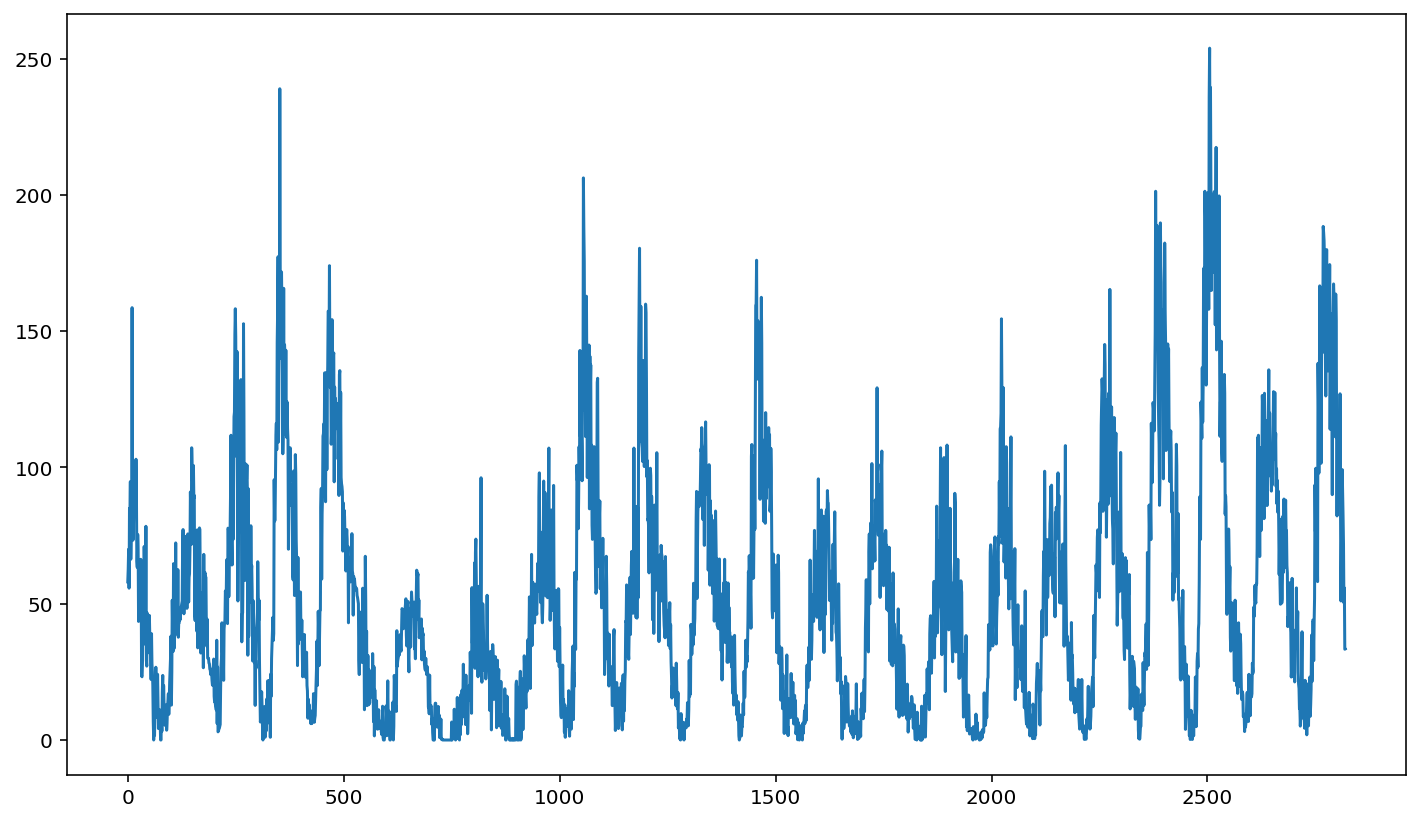

In [1]:
import matplotlib.pyplot as plt

data = []
with open("monthly-sunspots.txt") as f:
    for line in f:
        data.append(float(line))
        
plt.plot(data)

## Question 2

In [2]:
from time import time
with open("current_time.txt", "a") as f:
    f.write(str(time()) + "\n")

## Question 3

In [2]:
import csv
with open("periodic_table.csv") as f:
    reader = csv.reader(f) # create a reader object from the file
    next(reader) # ignore the header row of the CSV file
    i = 1
    for row in reader: 
        num = int(row[0]) 
        name = row[1]
        description = row[3]
        with open("element_" + str(num) + ".txt", "w") as f:
            f.write(name + "\n")
            f.write(description)
        if i >= 9:
            break
        i += 1

## Question 4

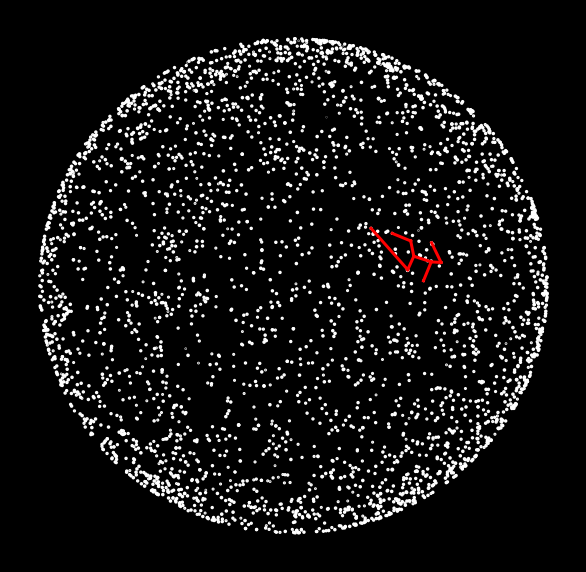

In [ ]:
import matplotlib.pyplot as plt
import csv


x = []
y = []
mag = []
star_name = []

with open("stars.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for row in reader:
        x.append(float(row[0]))
        y.append(float(row[1]))
        mag.append(float(row[4]) / 10)
        name_list = row[5].split(";")
        name = name_list[-1].strip()
        star_name.append(name)
        
        
fig, ax = plt.subplots(figsize=(5,5))
fig.patch.set_facecolor("black")
ax.axis("off")
ax.set_facecolor("black")
ax.scatter(x, y, marker="o", s=mag, color="white")
#ax.plot()

with open("Cas_lines.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for row in reader:
        name1 = row[0]
        name2 = row[1]
        i1 = star_name.index(name1)
        i2 = star_name.index(name2)
        x1 = x[i1]
        y1 = y[i1]
        x2 = x[i2]
        y2 = y[i2]
        ax.plot([x1, x2], [y1, y2], color="red")
        
        




## Question 5

Protein: GSSRTRLHQDSRGAP


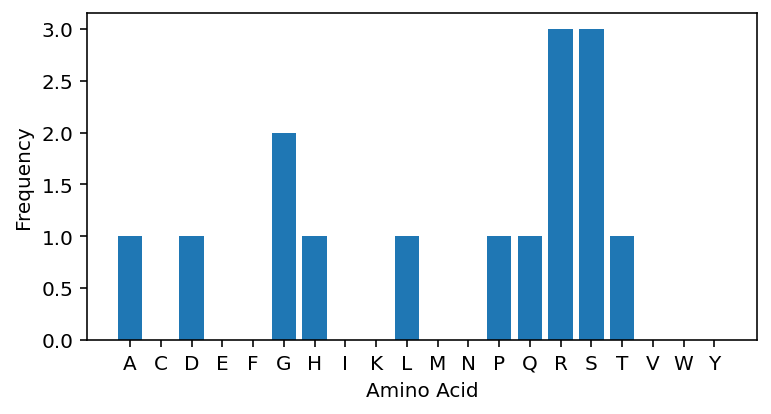

In [ ]:
with open("Ps_kr_G2B.fasta") as f:
    dna_seq = ""
    for line in f:
        if line[0] != ">":
            dna_seq += line.strip()
            
rna_seq = dna_seq.replace("T", "U")

codon_list = []
n = len(rna_seq)
for i in range(n):
    if rna_seq[i:i+3] == "AUG":
        j = i + 3
        break
        
for i in range(j, n-3, 3):
    codon = rna_seq[i:i+3]
    if codon == "UAG" or codon == "UAA" or codon == "UGA":
        break
    else:
        codon_list.append(codon)

genetic_code = ["GCA", "GCC", "GCG", "GCU", "UGC", "UGU", "GAC", "GAU", "GAA", "GAG", "UUC", "UUU", "GGA", "GGC", "GGG", "GGU", "CAC", "CAU", "AUA", "AUC", "AUU", "AAA", "AAG", "UUA", "UUG", "CUA", "CUC", "CUG", "CUU", "AUG", "AAC", "AAU", "CCA", "CCC", "CCG", "CCU", "CAA", "CAG", "AGA", "AGG", "CGA", "CGC", "CGU", "CGG", "AGC", "AGU", "UCA", "UCC", "UCG", "UCU", "ACA", "ACC", "ACG", "ACU", "GUA", "GUC", "GUG", "GUU", "UGG", "UAC", "UAU", "UAG", "UAA", "UGA"]

amino_acids = ["A", "A", "A", "A", "C", "C", "D", "D", "E", "E", "F", "F", "G", "G", "G", "G", "H", "H", "I", "I", "I", "K", "K", "L", "L", "L", "L", "L", "L", "M", "N", "N", "P", "P", "P", "P", "Q", "Q", "R", "R", "R", "R", "R", "R", "S", "S", "S", "S", "S", "S", "T", "T", "T", "T", "V", "V", "V", "V", "W", "Y", "Y", "!", "!", "!"]

protein = ""
for codon in codon_list:
    i = genetic_code.index(codon)
    aa = amino_acids[i]
    protein = protein + aa

print("Protein:", protein)

aa = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]

aa_counts = [0] * len(aa)

for c in protein:
    i = aa.index(c)
    aa_counts[i] += 1
    
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(aa, aa_counts)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency");
